#### Question: Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("delivery_time.csv")

In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data = data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

#### BASIC VISUALIZATION

C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

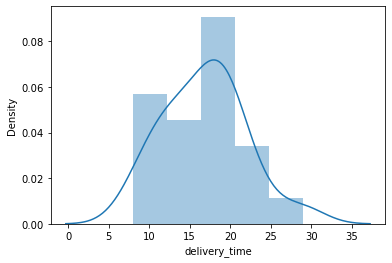

In [7]:
sns.distplot(data['delivery_time'])

C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

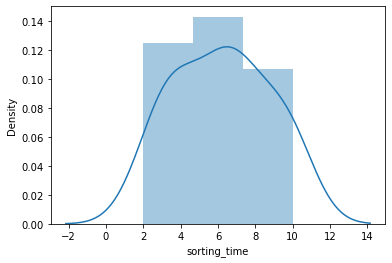

In [8]:
sns.distplot(data['sorting_time'])

### Correlation analysis

In [9]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


### Model Building with no transformation

In [10]:
model_no_trans = smf.ols("delivery_time~sorting_time", data=data).fit()

In [11]:
model_no_trans.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
model_no_trans.tvalues, model_no_trans.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [13]:
# Predicting Delivery time for 4 & 6 minutes of sorting time
newdata=pd.Series([4,6])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
model_no_trans.predict(data_pred)

0    13.178814
1    16.476853
dtype: float64

In [14]:
model_no_trans.rsquared, model_no_trans.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Model Building with log transformation

In [15]:
model_log = smf.ols("delivery_time~np.log(sorting_time)", data=data).fit()

In [16]:
model_log.tvalues, model_log.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [17]:
# Predicting Delivery time for 4 & 6 minutes of sorting time
newdata=pd.Series([4,6])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
model_log.predict(data_pred)

0    13.696517
1    17.363305
dtype: float64

In [18]:
model_log.rsquared, model_log.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

### Model Building with square root transformation

In [19]:
model_sqrt = smf.ols("delivery_time~np.sqrt(sorting_time)", data=data).fit()

In [20]:
model_sqrt.tvalues, model_sqrt.pvalues

(Intercept               -0.840911
 np.sqrt(sorting_time)    6.592434
 dtype: float64,
 Intercept                0.410857
 np.sqrt(sorting_time)    0.000003
 dtype: float64)

In [21]:
# Predicting Delivery time for 4 & 6 minutes of sorting time
newdata=pd.Series([4,6])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
model_log.predict(data_pred)

0    13.696517
1    17.363305
dtype: float64

In [22]:
model_sqrt.rsquared, model_sqrt.rsquared_adj

(0.695806227630867, 0.6797960290851232)

### Model Building with exponential transformation

In [23]:
model_exp = smf.ols("delivery_time~np.exp(sorting_time)", data=data).fit()

In [24]:
model_exp.tvalues, model_exp.pvalues

(Intercept               14.406456
 np.exp(sorting_time)     3.277108
 dtype: float64,
 Intercept               1.117304e-11
 np.exp(sorting_time)    3.964511e-03
 dtype: float64)

In [25]:
    # Predicting Delivery time for 4 & 6 minutes of sorting time
    newdata=pd.Series([4,6])
    data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
    model_exp.predict(data_pred)

0    15.105033
1    15.242109
dtype: float64

In [26]:
model_exp.rsquared, model_exp.rsquared_adj

(0.361117702270909, 0.3274923181799042)

By comparing the adjusted RSquare of different models, model with square root transformation on independent variable is yielding accurate results. Hence the model_sqrt is finalized.

### Now predicting with final model

In [27]:
# Predicting Delivery time for 4 & 6 minutes of sorting time
newdata=pd.Series([4,6])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
model_sqrt.predict(data_pred)

0    13.354345
1    16.921761
dtype: float64